<div style="border:solid Chocolate 2px; padding: 40px">

<b> Александр, привет!👋</b>

Меня зовут Горбунова Анастасия, и я буду давать обратную связь по твоему проекту. Предлагаю общаться на "ты", но если это  неудобно, обязательно скажи об этом, и мы перейдем на "вы"! Моя основная задача - поделиться своим опытом и помочь тебе пройти путь до аналитика данных.
    
Чтобы тебе проще было ориентироваться, мои комментарии будут отмечены <font color='green'>👍 зеленым</font>, <font color='Orange'>💡 желтым</font> и <font color='red'>❌ красным</font> цветами:



<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично! 👍:</b> 
    
Таким цветом отмечены правильные и удачные решения, на которые можно опираться в будущих проектах. 
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые рекомендации 💡:</b> 
        
Так отмечены комментарии-рекомендации на будущее или небольшие коррективы. Ты можешь учесть эти комментарии при выполнении следующих проектов. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку ❌:</b> 
    
Красным цветом отмечены комментарии, которые требуют твоего внимания. Решение на этом этапе требует переработки или внесения правок. После доработки проект будет принят.
</div>
    

В случае доработки проекта оставь все предыдущие комментарии без изменения. Пожалуйста, не удаляй, не перемещай и не изменяй мои комментарии. Это поможет выполнить повторную проверку твоего проекта оперативнее.
    
    
Также прошу реагировать на мои комментарии своими: если ты что-то меняешь в проекте по моим рекомендациям - пиши об этом в ячейке Markdown. Выдели свои комментарии каким-либо другим заметным цветом, явно  отличающимся от цвета моих комментариев. Это нужно, чтобы не создавалась путаница и было проще отследить изменения.


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>
    
Это шаблон для тебя, можешь воспользоваться им, или сделать по своему усмотрению. Так я смогу быстро найти твои комментарии.
</div>

<br/>
<div style="border:solid Red 2px; padding: 40px">
    <div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>

    
<font color='red'><b>На доработку ❌:</b>  </font>
    
Проект стоит начинать с заголовка. А также добавить введение: краткое описание проекта, цель проекта, описание данных, план работы. Тогда получатель отчета сможет быстрей его понять.

<h1>Сборный проект</h1>
<strong>Выявиление закономерностей, определяющих успешность видел-игры.</strong>

<h2>Описание проекта</h2>
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.<br> 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br> 
Мы имеем данные до 2016 года. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st

In [2]:
# df = pd.read_csv('datasets/games.csv')

<br/>
<div style="border:solid Red 2px; padding: 40px">
    <div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>

    
<b>На доработку ❌:</b> 
    
Кажется, работа над проектом велась локально и пути к файлам не были изменены на общедоступные. Стоит переписать код таким образом, что бы он запускался и в jupiter hub, и локально без внесения дополнительных правок. Этого можно добиться несколькими способами. Например, использовать конструкцию try-except для путей файлов: try - пути на локальном компьютере, except - пути на сервере. Или применить библиотеку os. Можно почитать про эту библиотеку здесь: https://pythonworld.ru/moduli/modul-os.html
    
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Согласен с замечанием</b>
</div>

In [3]:
try:
    df = pd.read_csv('datasets/games.csv')
except FileNotFoundError:
    df = pd.read_csv('games.csv')

In [4]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


<br/>
<div style="border:solid Red 2px; padding: 40px">
    <div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку ❌:</b> 
    
Стоит добавить вывод по шагу обзора данных. Что обнаружено, как нужно подготовить данные?
    
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Обзор данных</b>
    
Данные представляют собой DataFrame (таблицу) со следующими полями (столбцами):
<ul>
    <li>Name            — название игры</li>
    <li>Platform        — платформа</li>
    <li>Year_of_Release — год выпуска</li>
    <li>Genre           — жанр игры</li>
    <li>NA_sales        — продажи в Северной Америке (миллионы проданных копий)</li>
    <li>EU_sales        — продажи в Европе (миллионы проданных копий)</li>
    <li>JP_sales        — продажи в Японии (миллионы проданных копий)</li>
    <li>Other_sales     — продажи в других странах (миллионы проданных копий)</li>
    <li>Critic_Score    — оценка критиков (максимум 100)</li>
    <li>User_Score      — оценка пользователей (максимум 10)</li>
    <li>Rating          — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>
</ul>
Все численные данные представленны в формате floa, некуотыре из них надо перевести в формат int, наприме год релиза игры. В данных встречаются пропуски, необходимо изучиьт их, чтобы понять что с ними делать дальше.
</div>

<h2>Предобработка данных

In [5]:
# Так наглядней чем df.columns
for column in df.columns:
    print(column)

Name
Platform
Year_of_Release
Genre
NA_sales
EU_sales
JP_sales
Other_sales
Critic_Score
User_Score
Rating


<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

    
</div>

In [6]:
df.columns = df.columns.map(lambda x: x.lower())

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Привести названия к нажнему регистру можно командой df.columns.str.lower(). 
    
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Хорошая подсказка. Благодарю</b>
</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid Red 2px; padding: 40px">
    <div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку ❌:</b> 
    
Стоит добавлять в работу проверку данных на дубликаты. В некоторых исследованиях дубликаты могут серьезно исказить результаты и привести к ошибочным выводам.
    
</div></div>

In [8]:
df[df.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Явных дубликатов не обнаружено</b><br>
Проверим на дубликаты значения в некоторых полях
</div>

In [72]:
for col in ['platform', 'genre', 'rating']:
    print(col, df[col].unique())

platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
rating ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Не явных дубликатов не обнаруженно</b><br>
</div>

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Для удобства можно еще сразу все данные вывести в процентах по пропущенным значениям. `data.isna().sum()/len(data)*100` или `data.isna().mean()*100`. Возможно это будет более оптимально и позволит сразу увидеть где максимальное/минимальное количество пропусков, и в каких колонках похожий процент пропусков.
    
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Спасибо</b><br>
</div>

In [10]:
df['year_of_release'].isna().sum()

269

Изучим записи, которые содержат пропуски в поле `year_of_release`. Таких записей 269, что от общего числа:

In [11]:
df['year_of_release'].isna().sum() / len(df)

0.01609332934489979

Чуть больше процента. Впринципе, таким колличеством мрожно и принебречь. Но, всё таки взглянем на них:

In [12]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df[df['year_of_release'].isna()]['genre'].value_counts().sort_values(ascending=False)

Action          62
Sports          42
Misc            29
Shooter         27
Racing          23
Role-Playing    17
Simulation      16
Fighting        12
Puzzle          11
Adventure       10
Platform        10
Strategy        10
Name: genre, dtype: int64

Можно заметить, что большенство из таких игр – это спортивные симуляторы (221 например –  это футбол). И они содержат год в названии

In [14]:
df[(~df['year_of_release'].isna()) & (df['name'].str.contains('Soccer'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E
190,FIFA Soccer 13,X360,2012.0,Action,1.09,3.47,0.03,0.57,90.0,6.1,E
202,FIFA Soccer 11,PS3,2010.0,Sports,0.61,3.28,0.06,1.12,89.0,8,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E
274,FIFA Soccer 06,PS2,2005.0,Sports,0.78,2.55,0.04,0.84,80.0,7.8,E
...,...,...,...,...,...,...,...,...,...,...,...
16033,FIFA Soccer 08,PC,2007.0,Sports,0.00,0.01,0.00,0.00,77.0,6.1,E
16060,Worldwide Soccer Manager 2006,PC,2004.0,Sports,0.00,0.01,0.00,0.00,89.0,NaN,E
16176,Fab 5 Soccer,DS,2008.0,Sports,0.01,0.00,0.00,0.00,NaN,tbd,E
16528,Pro Evolution Soccer 2010,PC,2009.0,Sports,0.00,0.01,0.00,0.00,78.0,6.9,E


Причём, нельзя просто так взять эту цифру и заполнить ей пропушенные значения, потому что:
<ol>
    <li>Где-то в названии игры год указан четырех значным числом (2011), а где-то двух значным (11)
    <li>В большенстве названий указан следующий год после выхода игры
    <li>Где-то год указан в скобках
<ol><br>
Всё это надо учесть

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Верно.
    
</div>

In [15]:
df.loc[(~df['year_of_release'].isna()) & (df['name'].str.contains('20'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,NaN,tbd,E
16658,Driving Simulator 2011,PC,2011.0,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Как ты и обратил внимание, где то год в названии совпадает с годом релиза, а в некоторых играх отличается на единицу.
    
</div>

В первую очередь обработаем записи, где год указан четырехзначным числом.<br>
Посмотрим на них:

In [16]:
df[
        (df['year_of_release'].isna())
        &
        (df['name'].str.contains('20'))
    ]['name']\
        .str.split(' ')

183                          [Madden, NFL, 2004]
377                         [FIFA, Soccer, 2004]
475             [wwe, Smackdown, vs., Raw, 2006]
1650                     [NASCAR, Thunder, 2003]
2492                      [MLB, SlugFest, 20-03]
2572        [PES, 2009:, Pro, Evolution, Soccer]
3486                         [Madden, NFL, 2002]
4775                        [NFL, GameDay, 2003]
5156                           [NBA, Live, 2003]
5336                      [Tomb, Raider, (2013)]
5655                  [All-Star, Baseball, 2005]
5889                           [NBA, Live, 2003]
6954                                  [Jet, X20]
8918                  [All-Star, Baseball, 2005]
13195                   [Tour, de, France, 2011]
13929                        [Sega, Rally, 2006]
15953    [PDC, World, Championship, Darts, 2008]
16079                  [Football, Manager, 2007]
16373    [PDC, World, Championship, Darts, 2008]
Name: name, dtype: object

Вручную обработаем совсем уж выбивающиеся значения (их всего два):

In [17]:
df.loc[(df['year_of_release'].isna())  & (df['name'] == 'PES 2009: Pro Evolution Soccer'), 'year_of_release'] = 2009
df.loc[(df['year_of_release'].isna())  & (df['name'] == 'Jet X20'), 'year_of_release'] = 0 # Год всё равно неизвестен

Остальное обработаем автоматически

In [18]:
df.loc[(df['year_of_release'].isna())  & (df['name'].str.contains('20')), 'year_of_release'] = \
df[(df['year_of_release'].isna()) & (df['name'].str.contains('20'))]['name'].str.split(' ').map(lambda x: int(x[-1] \
                                                                     .replace('-', '') \
                                                                     .replace('(', '') \
                                                                     .replace(')', ''))-1)

Теперь обработаем записи, где год указан двухзначным числом

In [19]:
# df.loc[df['year_of_release'].isna(), 'year_of_release'] = \
df.loc[(df['year_of_release'].isna())]['name'].str.split(' ').map(lambda x: '20'+str(int(x[-1])-1 )if len(x[-1])==2 and x[-1].isdigit() else 0)

456      0
609      0
627      0
657      0
678      0
        ..
16348    0
16405    0
16448    0
16458    0
16522    0
Name: name, Length: 250, dtype: object

In [20]:
df[df['name'] == 'PES 2009: Pro Evolution Soccer' ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
617,PES 2009: Pro Evolution Soccer,PS2,2008.0,Sports,0.13,0.07,0.26,2.05,NaN,NaN,NaN
783,PES 2009: Pro Evolution Soccer,PS3,2008.0,Sports,0.11,1.33,0.40,0.26,NaN,NaN,NaN
2068,PES 2009: Pro Evolution Soccer,X360,2008.0,Sports,0.13,0.76,0.03,0.09,NaN,NaN,NaN
2572,PES 2009: Pro Evolution Soccer,PSP,2009.0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
4329,PES 2009: Pro Evolution Soccer,Wii,2009.0,Sports,0.09,0.26,0.05,0.05,NaN,NaN,NaN


Т.к. на данном этапе без детального исследования не понятно, можно ли данные с пропусками удалить и какая причина пропуска или закономерность.<br>
заменим пропуски года релиза игры на 0. А потом при необходимости заменим это значение или удалим строки с этим значением<br>

In [21]:
df['year_of_release'].fillna(0, inplace=True)
# Преведём данные следующих столбцов к формату int
df['year_of_release'] = df['year_of_release'].astype('int')

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Хороший анализ и попытка восстановления данных. Здорово! 👍 Но, эти пропуски составляют менее 2% от общего числа строк, как ты и отметил выше. Такую малую долю пропусков можно сразу удалять для экономии времени.
    
</div>

In [22]:
len(df[df['user_score'] == 'tbd'])

2424

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Заменим такие значения на привычное нам `NaN`

In [23]:
df['user_score'] = df['user_score'].map(lambda  x: x.replace('tbd', 'NaN') if x=='tbd' else x)
df['user_score'] = df['user_score'].astype('float')

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>
    
Ты делаешь абсолютно правильно, что сначала заменяешь значения tbd на NaN в колонке user_score, т.к. метод astype не сработает при наличии в колонке нечисловых символов или неоднородных значений (в нашем случае - tbd), потому что не сможет преобразовать текст в тип float. 

Можно воспользоваться функцией to_numeric, которая позволит обойти значения tbd и автоматически заменит это недопустимое значение на значение NaN с помощью передачи аргумента errors=coerce. В таком случае не понадобится выполнять дополнительные преобразования, чтобы изменение типа работало правильно.

Вот здесь можно почитать более подробно про  вспомогательные функции pandas: https://dfedorov.spb.ru/pandas/%D0%9E%D0%B1%D0%B7%D0%BE%D1%80%20%D1%82%D0%B8%D0%BF%D0%BE%D0%B2%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20pandas.html
    
</div>

<br/>
<div style="border:solid Red 2px; padding: 40px">
    <div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку ❌:</b> 
    
Нет обработки пропусков name, genre, critic_score, user_score и rating. Что будешь с ними делать? И будешь ли? Если оставляешь пропусками, напиши комментарий с аргументами. Какие могут быть причины, которые могли привести к пропускам?

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Испарвляюсь:</b><br>
</div>

In [79]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_general
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.31,GEN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03,GEN


Две строки с незаполненным значением поля Name. Какая-то игра, выпущенная в 93 году. Можно смело исключить данные:

In [89]:
df = df[~df['name'].isna()]

In [81]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_general


In [84]:
df['critic_score'].isna().mean()

0.5131334889008556

Пропущена половина значений. Это плохо. Попробуем разобраться почему:

<AxesSubplot: xlabel='year_of_release'>

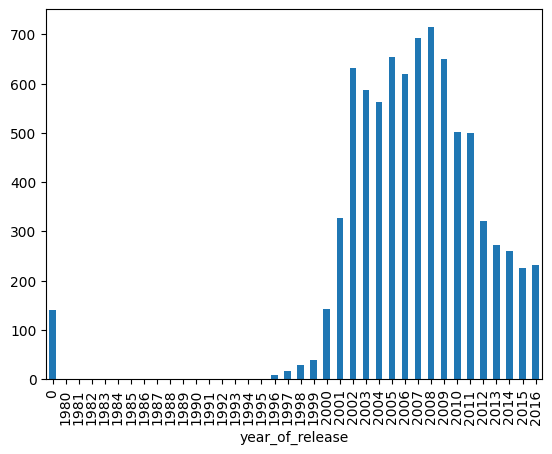

In [88]:
df.groupby('year_of_release')['critic_score'].count().plot.bar()

Видимо, профессиональные критики в облости видеоо игр стали появляться только во второй половине 90х. Т.к. в дальнешем при анализе мы будем рассматривать не весь период и скорее всего игры вышедшие начиная с 2000. Не будем заполнять пропуски.

In [90]:
df['user_score'].isna().mean()

0.5458625022437623

<AxesSubplot: xlabel='year_of_release'>

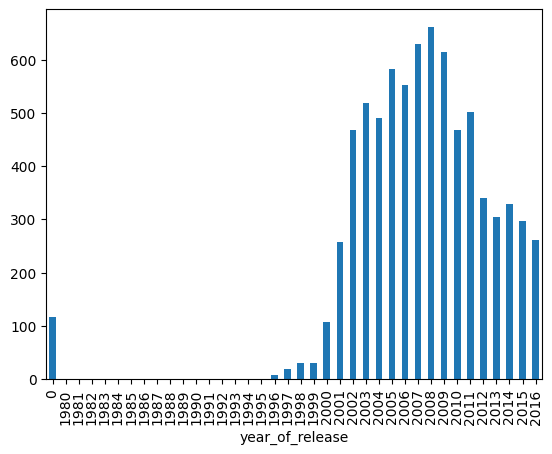

In [91]:
df.groupby('year_of_release')['user_score'].count().plot.bar()

Такая же ситуация как и с критиками. Подозреваю, что тоже будет и с рейтингами

In [92]:
df['rating'].isna().mean()

0.40471489259857596

<AxesSubplot: xlabel='year_of_release'>

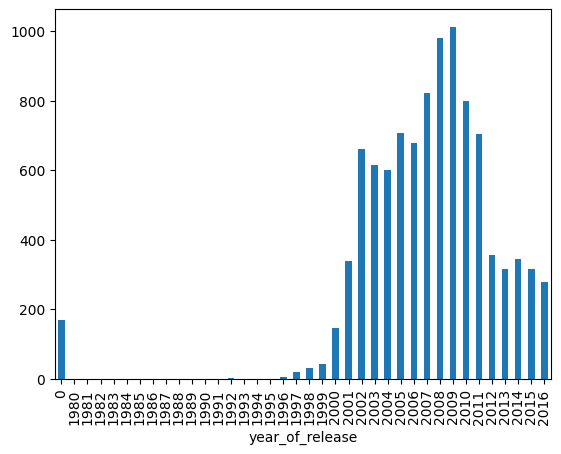

In [94]:
df.groupby('year_of_release')['rating'].count().plot.bar()

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Отсутствующий значения свезаны с тем, что раньше небыло практики учета таких значений.</b><br>
Исключать пропуски на данном этапе не будем, просто учтем и/или исключим на этапе анализа данных, если это будет необходимо.<br>
Заполнять пропуски какми-либо усредненными значения, не вижу смыла. Данных много, а пропусков относительно мало. Это не должно мешать анализ, а зполнение не особо поможет
</div>

In [24]:
# df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

<br/>
<div style="border:solid Red 2px; padding: 40px">
    <div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку ❌:</b> 
    

Здесь ты забыл посчитать продажи по другим регионам (other_sales). Их обязательно необходимо добавить в суммарные продажи, иначе в дальнейшем результат анализа исказится.
    
  
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>А вот это мой косяк</b><br>
Исправляюсь
</div>

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<h2>Исследовательский анализ данных

<h3> Изучим, сколько игр выпускалось в разные года:

<AxesSubplot: xlabel='year_of_release'>

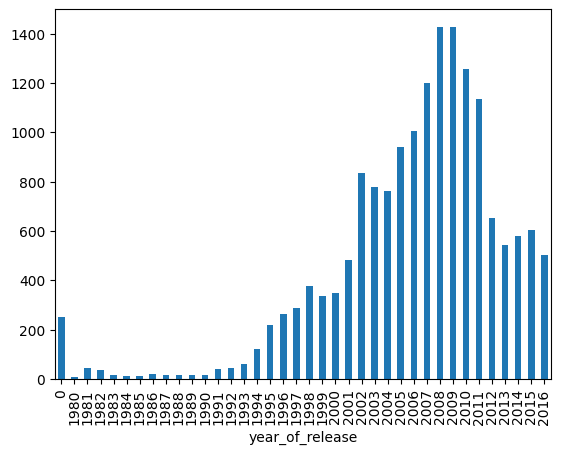

In [25]:
df.groupby('year_of_release')['name'].count().plot.bar()

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>
    
Если ты используешь визуализацию в проекте, стоит уделять больше времени ее оформлению: ко всем графикам в проекте важно добавлять общий заголовок, подписи к осям, убрать технические строчки . Это помогает сразу считать информацию. Пожалуйста, скорректируй графики во всем проекте:)

Ниже добавляю ссылки по оформления графиков в библиотеках seaborn и matplotlib:

https://pyprog.pro/mpl/mpl_title.html

https://pyprog.pro/mpl/mpl_axis_signatures.html
    
https://pythobyte.com/matplotlib-bar-80584/

https://devpractice.ru/matplotlib-lesson-3-3-text-elements/

https://pythobyte.com/matplotlib-bar-80584/

https://www.dataforeverybody.com/change-seaborn-title-chart-axes-font/

https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://www.python-graph-gallery.com/4-add-title-and-axis-label
    
</div>

<strong>Вывод:</strong><br>
Количество релизов видеоигр постепенно увеличивалось с 1991 года и пришелся на 2008-2009. Далее резкое падение и к 2016 рынок стабилизировался.

<div style="border:solid Orange 2px; padding: 40px">
<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<font color='Orange'><b>Некоторые рекомендации 💡:</b> </font>
        
Можно еще число уникальных игр посмотреть. Это, наверное, точнее будет отвечать на вопрос.
        
</div>

<h3>Изучим, как менялись продажи по платформам:

Выбереме платформы с максимальными суммарными продажами:

In [26]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
GB       247.26
NES      245.74
3DS      245.64
PC       237.14
N64      214.30
SNES     196.82
GC       193.75
XOne     145.05
2600      96.07
WiiU      76.24
PSV       47.61
SAT       33.52
GEN       29.80
DC        15.68
SCD        1.81
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>


<AxesSubplot: xlabel='year_of_release'>

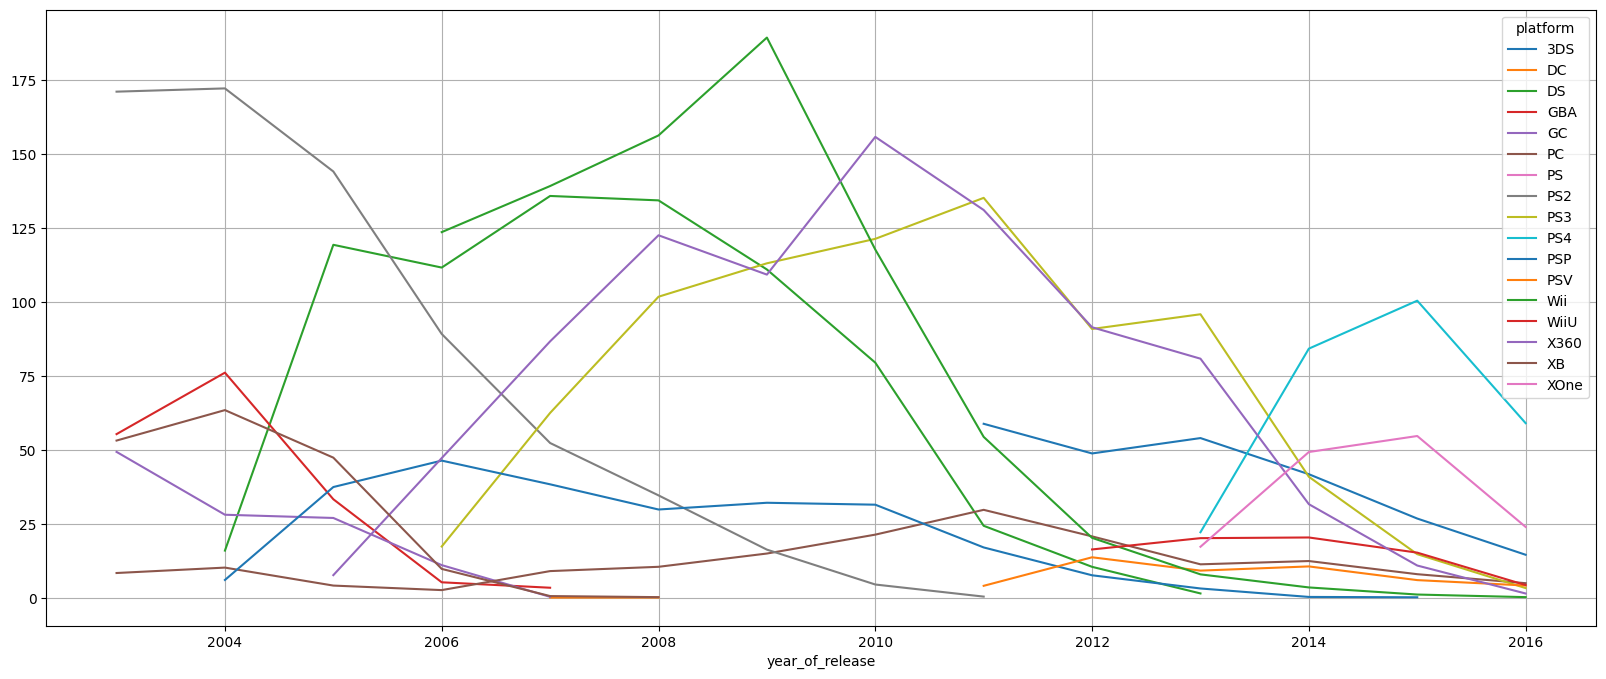

In [27]:
df[df['year_of_release'] > 2002].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,8), grid=True)

<div style="border:solid Orange 2px; padding: 40px">
<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<font color='Orange'><b>Некоторые рекомендации 💡:</b> </font>
        

Техническую строку `<AxesSubplot:...>` можно убрать с помощью метода plt.show() или добавления в конце кода `;`
    
        
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Спасибо. Учту</b><br>
</div>

График получился не очень читабельным. Консоли одной макри сменяют друг друга поколение за поколением, продажи прошлых поколений плавно падают. Новых взлетают и т.д. В принципе, это полезная информация, Но попробуем объединить их и посмотреть "в общем":

In [28]:
df['platform_general'] = df['platform']
df['platform_general'] = df['platform_general'].map(lambda x: 'PS'   if 'PS' in x else x)
df['platform_general'] = df['platform_general'].map(lambda x: 'XBox' if 'X'  in x else x)
df['platform_general'] = df['platform_general'].map(lambda x: 'DS'   if 'DS' in x else x)

<AxesSubplot: xlabel='year_of_release'>

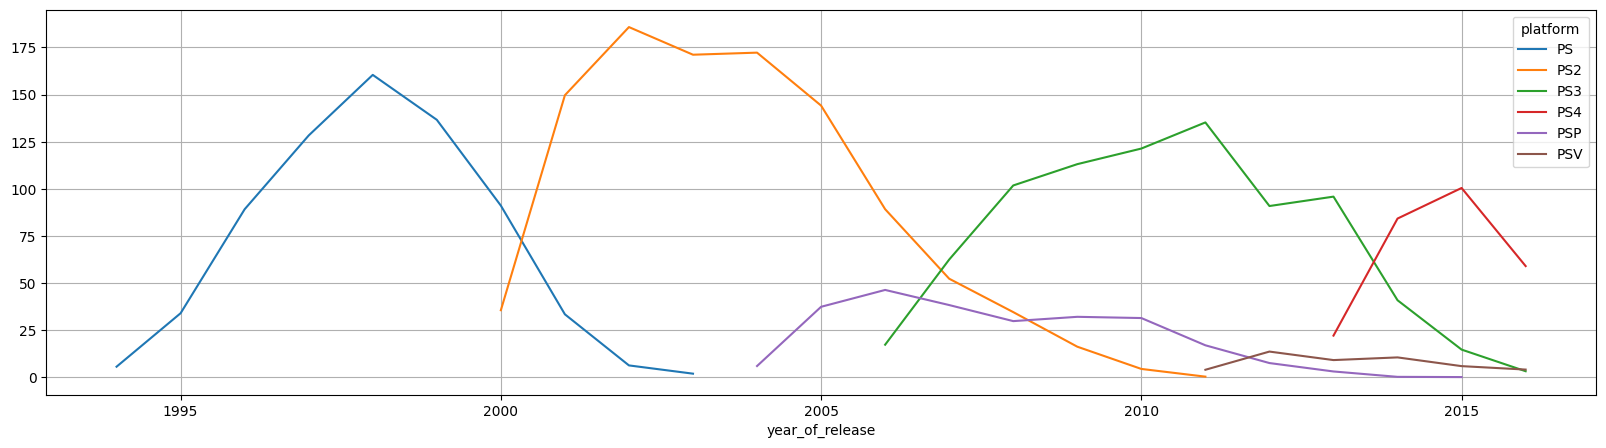

In [29]:
df[(df['platform_general'] == 'PS') & (df['year_of_release'] > 0)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,5), grid=True)

<AxesSubplot: xlabel='year_of_release'>

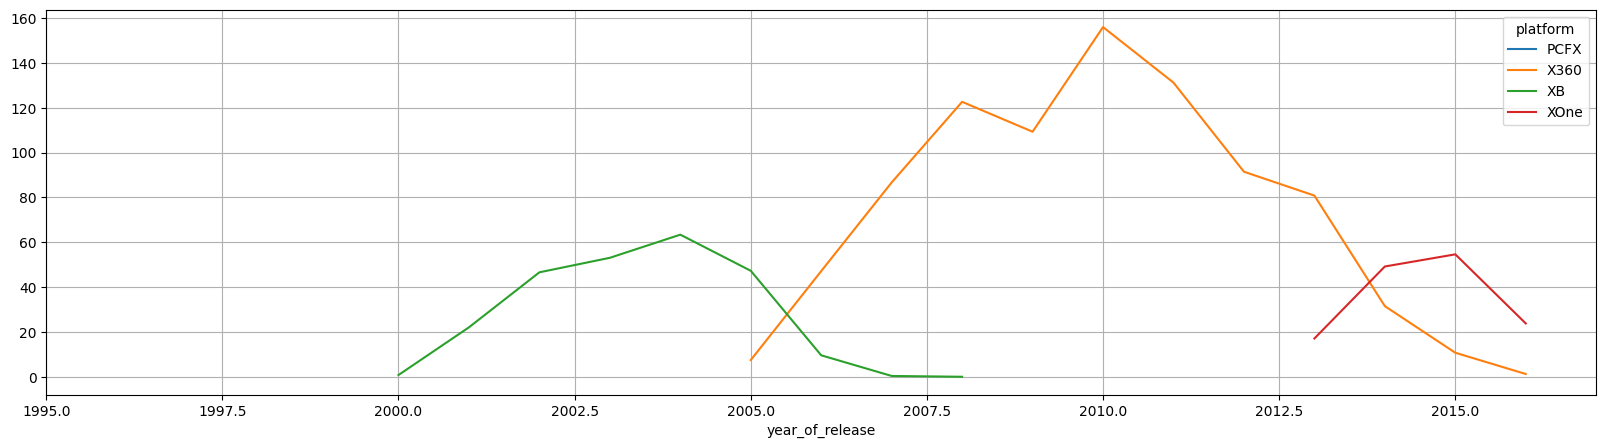

In [30]:
df[(df['platform_general'] == 'XBox') & (df['year_of_release'] > 0)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,5), grid=True)

<AxesSubplot: xlabel='year_of_release'>

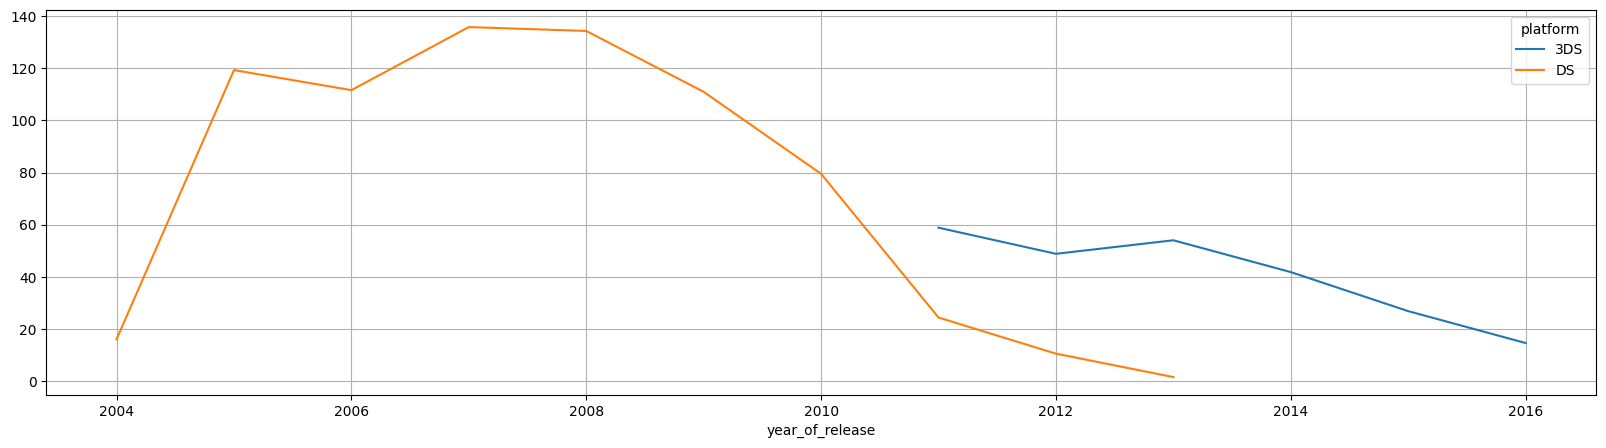

In [31]:
df[(df['platform_general'] == 'DS') & (df['year_of_release'] > 2000)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,5), grid=True)

Поколения платформ меняются каждые 5 лет, но продажи игр могу растянуться на 10 лет, хотя период высоких продаж также будет приходить на пятилетние периоды.<br>
Но для определения фактора, влияющего на продажи, все-таки, возьмём период в 10 лет:

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>
    
Согласна. В среднем за 10 лет продажи на любой платформе падают до 0.
    
</div>

<br/>
<div style="border:solid Red 2px; padding: 40px">
    <div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку ❌:</b> 
    
Однако, для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Я бы сказала, что максимально допустимый период - 5 лет. Но и слишком короткий период тоже брать не стоит.
    
Еще хочу сказать, что в задании разделены понятия жизненного цикла и актуального периода. Жизненный цикл консоли, который определяли выше - это усредненный срок продолжительности жизни. Потенциально жизненный цикл может составлять и 4, и 10 и 20 лет, а актуальный период может существенно отличаться от жизненного цикла. Актуальный период - это период, который нам надо взять, чтобы спрогнозировать 2017год, а для этого нужно учесть только тренды последних лет.     
    
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Тогда возьму период в 4 года</b><br>
</div>

In [32]:
# df2 = df[df['year_of_release'] >= df['year_of_release'].max()  - 10]

In [98]:
df2 = df[df['year_of_release'] >= df['year_of_release'].max()  - 4]

<AxesSubplot: xlabel='year_of_release'>

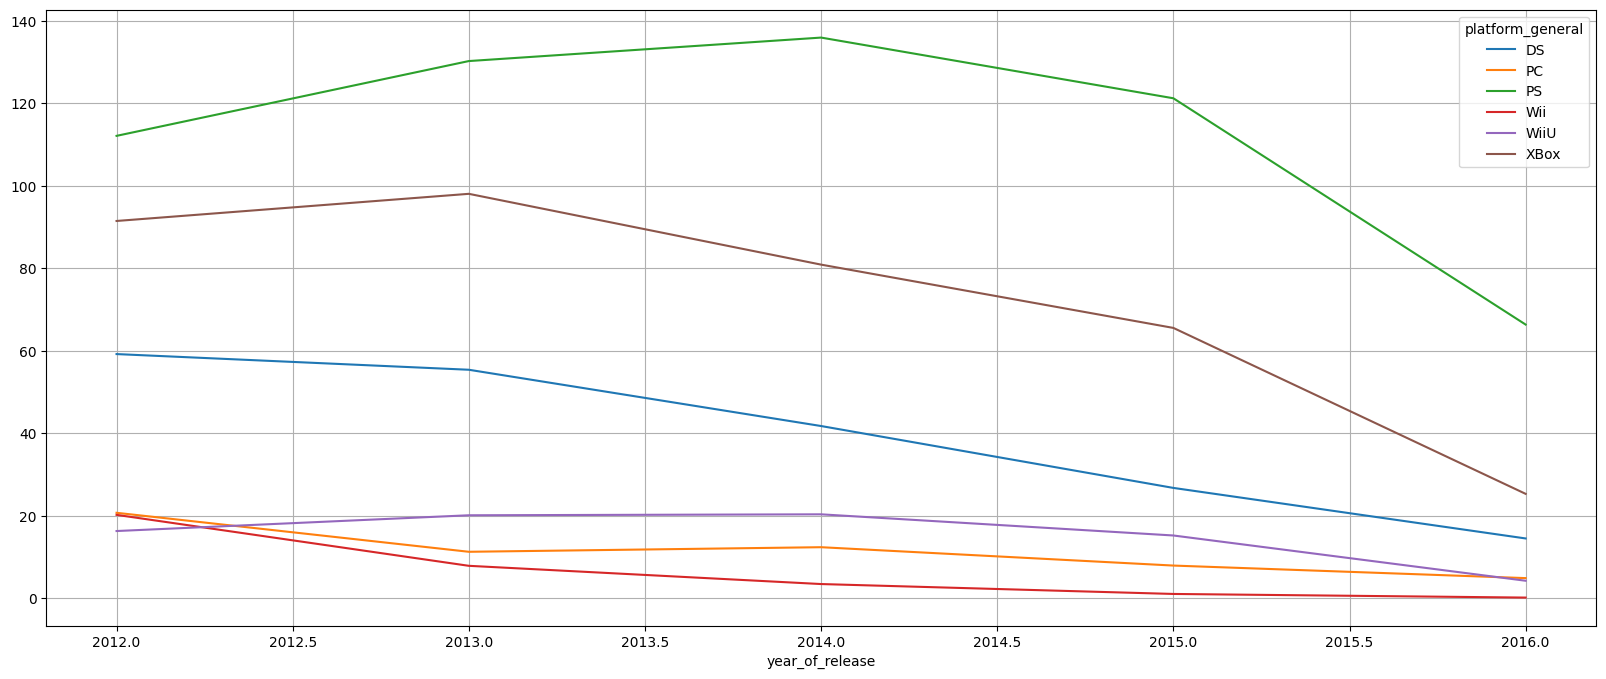

In [99]:
df2.pivot_table(index='year_of_release', columns='platform_general', values='total_sales', aggfunc=sum).plot.line(figsize=(20,8), grid=True)

Наблюдается падение рынка в целом после 2010 года. Но продажи PlayStation, XBox и Nintendo DS. Но т.к. мы смотри продажи по объединённым, маркам изучи эти платформы подробнее

<AxesSubplot: xlabel='year_of_release'>

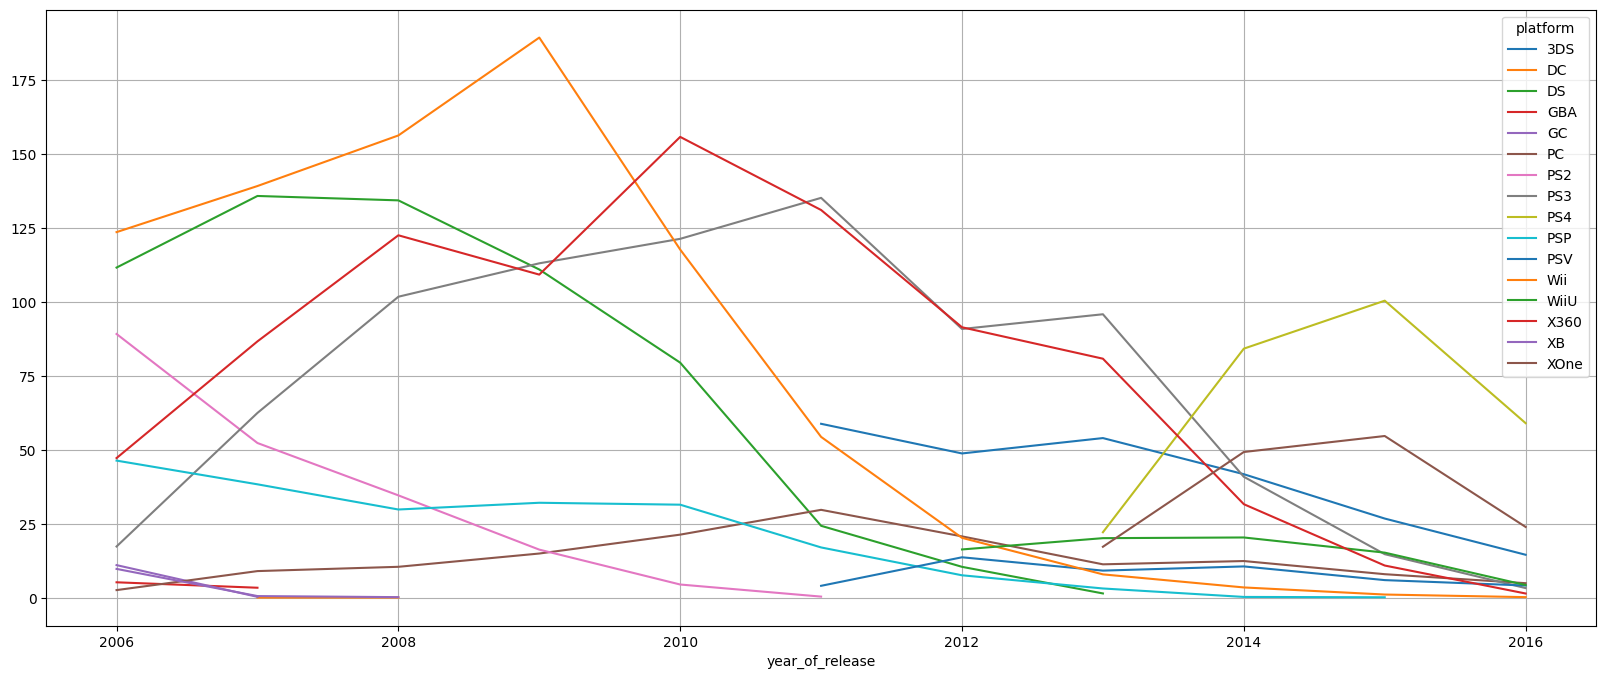

In [34]:
df2.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,8), grid=True)

И так, интересн для нас будут представлять следующие платформы:<br>
<ol>
    <li><b>PS4</b> и <b>XBox One</b>
    <li>Так же можно рассмотреть <b>3DS</b>. С ондной стороны, эта платформа демонстрирует стабильное падение продаж на протежении последних пяти лет, но подение это сильно линейно, значит объём продаж будет легко прогнозируем и не сложно будет закупить именно столько игр, сколько мыц точно сможем продать и как следствие заработать – пусть и не так много, но в целомм, на данный момент продажи игр этой платформы идут на третьем месте
</ol>

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>
    
Хороший анализ. Молодец.
    
</div>

<div style="border:solid Orange 2px; padding: 40px">
<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые рекомендации 💡:</b> 
        
Хорошо бы выделять новые этапы анализа заголовками и подразделами.        

In [36]:
df.groupby('platform')['name'].count().sort_values(ascending=False).head(7)

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
Name: name, dtype: int64

Посмотрим, как влияют на продажи внутри одной популярной платформы (PlayStation, включая PSP и PS Vita) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сделаем вывод:

In [37]:
df_ps = df2[df2['platform_general'] == 'PS']

Для начала, посмотрим насколько расходятся вкусы профессиональных критиков и обычных поль

<AxesSubplot: xlabel='critic_score', ylabel='user_score'>

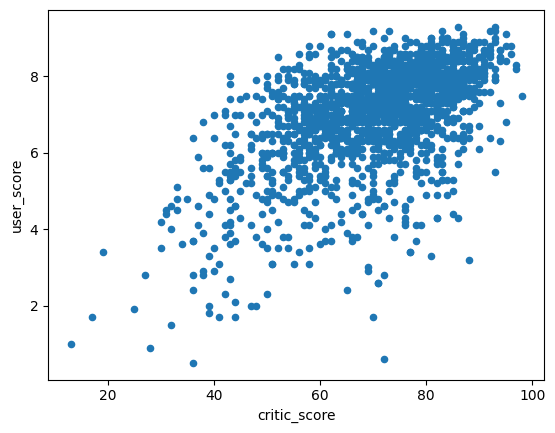

In [38]:
df_ps.plot.scatter(x='critic_score', y='user_score')

Ничего интересного. Посмотрим на числовую характеристику корреляции:

In [39]:
df_ps['critic_score'].corr(df_ps['user_score'])

0.5489223230787996

Корреляция средняя, т.е. мнения критиков и игроков часто расходяться<br>
Проверим, к кому же мы чаще прислушиваемся при покупке игры. Оценим влияния и тех и других на продажи<br>
Влияние критиков:

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

  
    
</div>

<AxesSubplot: xlabel='user_score', ylabel='total_sales'>

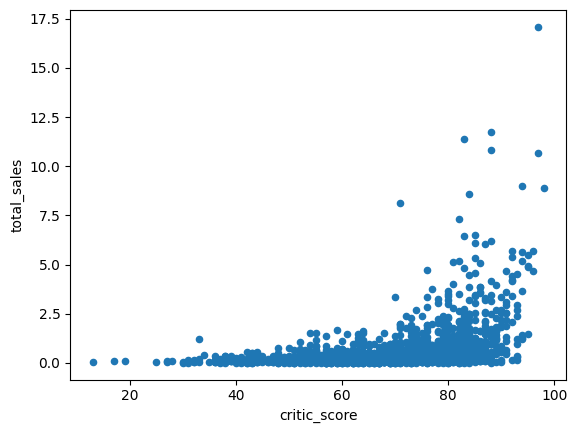

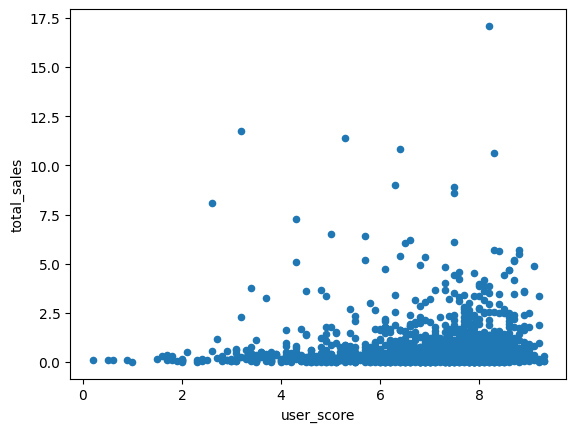

In [40]:
df_ps.plot.scatter(x='critic_score', y='total_sales')
df_ps.plot.scatter(x='user_score', y='total_sales')

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Не забывай подписывать графики, чтобы любой пользователь отчета мог понять, о чем идет речь.
    
</div>

Судя графикам, у игр, плохо оцененными игроками всё же встречаются хорошие продажи, а вот у игр с низкой оценкой критиков таких продаж не встречается.<br>
Для онокнчательного вывода, посмотрим так же на численные оценик корреляций

In [41]:
print('Влияние критиков на продажи', df_ps['critic_score'].corr(df_ps['total_sales']))
print('Влияние игроков на продажи', df_ps['user_score'].corr(df_ps['total_sales']))

Влияние критиков на продажи 0.40279018499316277
Влияние игроков на продажи 0.06899118006073247


<strong>Вывод:</strong><br>
Влияние игроков ниже. Значит для подбора ассортимена для магазина игр стоит прислушиваться к мнению профессиональных критиков.
Но посмотрим нак же на подобные корреляции платформ XBox и DS:

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Стоит отметить, что 0.4 это слабая связь между продажами и оценками критиков. А вот связь между продажами и оценками пользователей отсутствует вовсе.  
    
</div>

XBox :
Критики 0.3806984488381476
Игроки 0.09222800941018948
DS :
Критики 0.2657225292077062
Игроки 0.14898856987009937


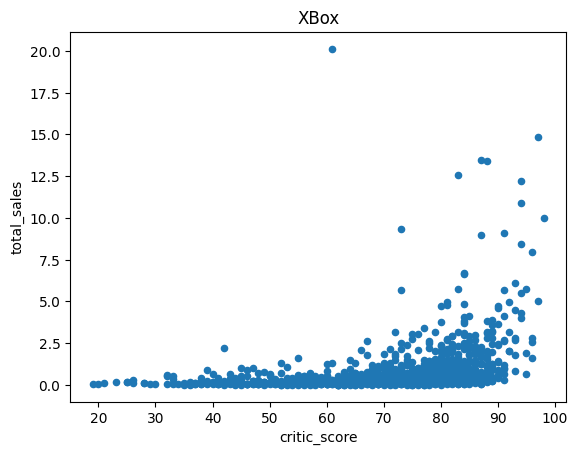

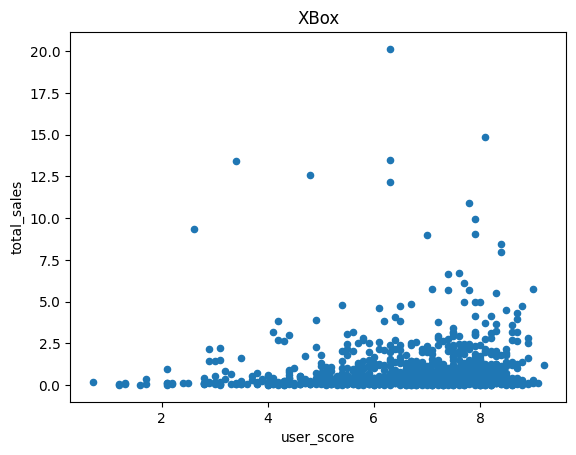

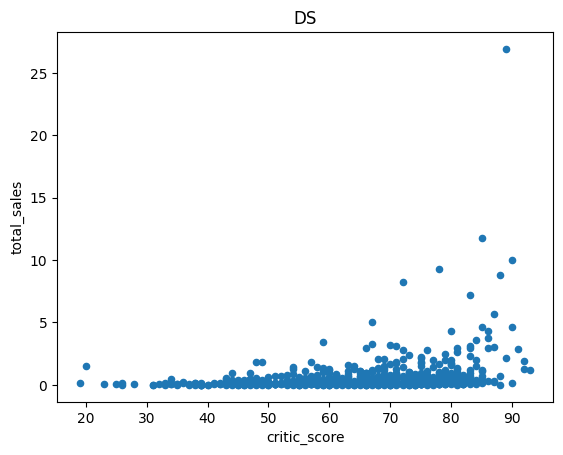

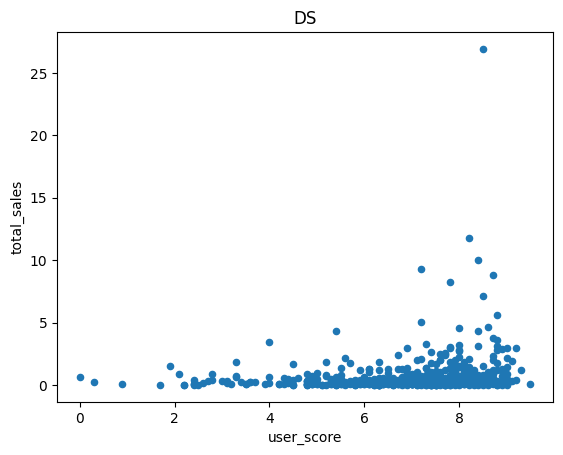

In [42]:
for platform in ['XBox', 'DS']:
    df2[df2['platform_general'] == platform].plot.scatter(x='critic_score', y='total_sales', title=platform)
    df2[df2['platform_general'] == platform].plot.scatter(x='user_score', y='total_sales', title=platform)

    print(platform, ':')
    print(f'Критики', df2[df2['platform_general'] == platform]['critic_score'].corr(df2[df2['platform_general'] == platform]['total_sales']))
    print(f'Игроки',  df2[df2['platform_general'] == platform]['user_score'].corr(df2[df2['platform_general'] == platform]['total_sales']))

На других популярных платформах вывод сохраняется

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Молодец..  
    
</div>

Посмотрим на общее распределение игр по жанрам:

<AxesSubplot: xlabel='genre'>

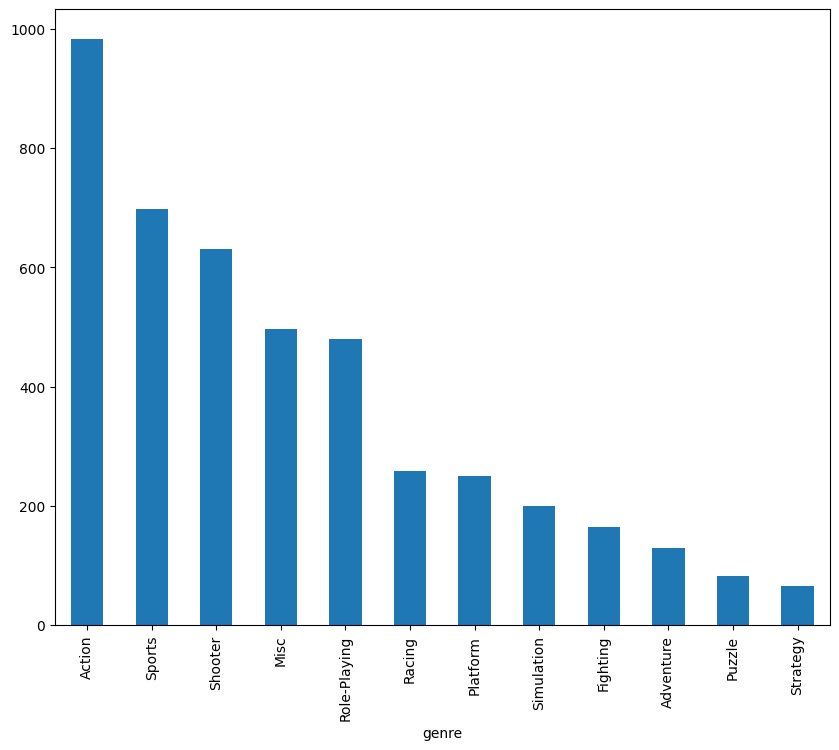

In [43]:
df2.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,8))

В пятёрку самых продаваемых жанров входят:
<ol>
<li>Action</li>
<li>Sports</li>
<li>Shooter</li>
<li>Misc</li>
<li>Role_Playing</li>
</ol><br>
При запукпе ассортимента стоит делать упор на эти жанры. Но для расстановки преоритетов, изучим также валатильность продаж этих жанров:

In [44]:
profitable_genres = list(df2.groupby('genre', as_index=False)['total_sales'].sum().sort_values(by='total_sales', ascending=False).head()['genre'])

<AxesSubplot: >

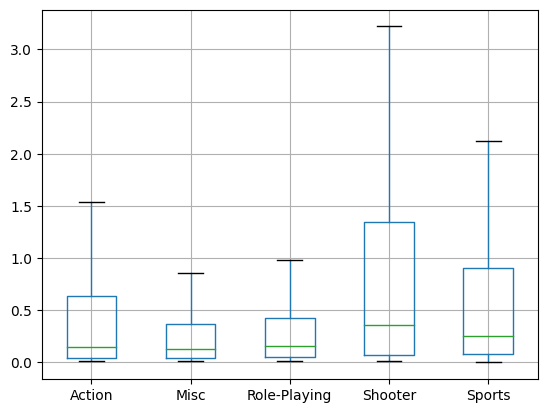

In [45]:
df2.query("genre in @profitable_genres").pivot_table(index='name', columns='genre', values='total_sales', aggfunc=sum).boxplot(showfliers = False)

Сильно выбиваются по продажам от дельные игры в жанре Shooter. Помсмотрим, что это за игры:

In [46]:
df2[df2['genre'] == 'Shooter'].groupby('name')['total_sales'].sum().sort_values(ascending=False)

name
Call of Duty: Modern Warfare 3                                     27.31
Call of Duty: Black Ops                                            26.12
Call of Duty: Black Ops II                                         25.64
Call of Duty: Ghosts                                               24.31
Call of Duty: Black Ops 3                                          22.18
                                                                   ...  
Tom Clancy's  Ghost Recon Advanced Warfighter (weekly JP sales)     0.01
DoDonPachi Saidaioujou                                              0.01
DoDonPachi Daifukkatsu: Black Label                                 0.01
F.E.A.R. Perseus Mandate                                            0.01
Caladrius                                                           0.01
Name: total_sales, Length: 406, dtype: float64

<AxesSubplot: xlabel='name'>

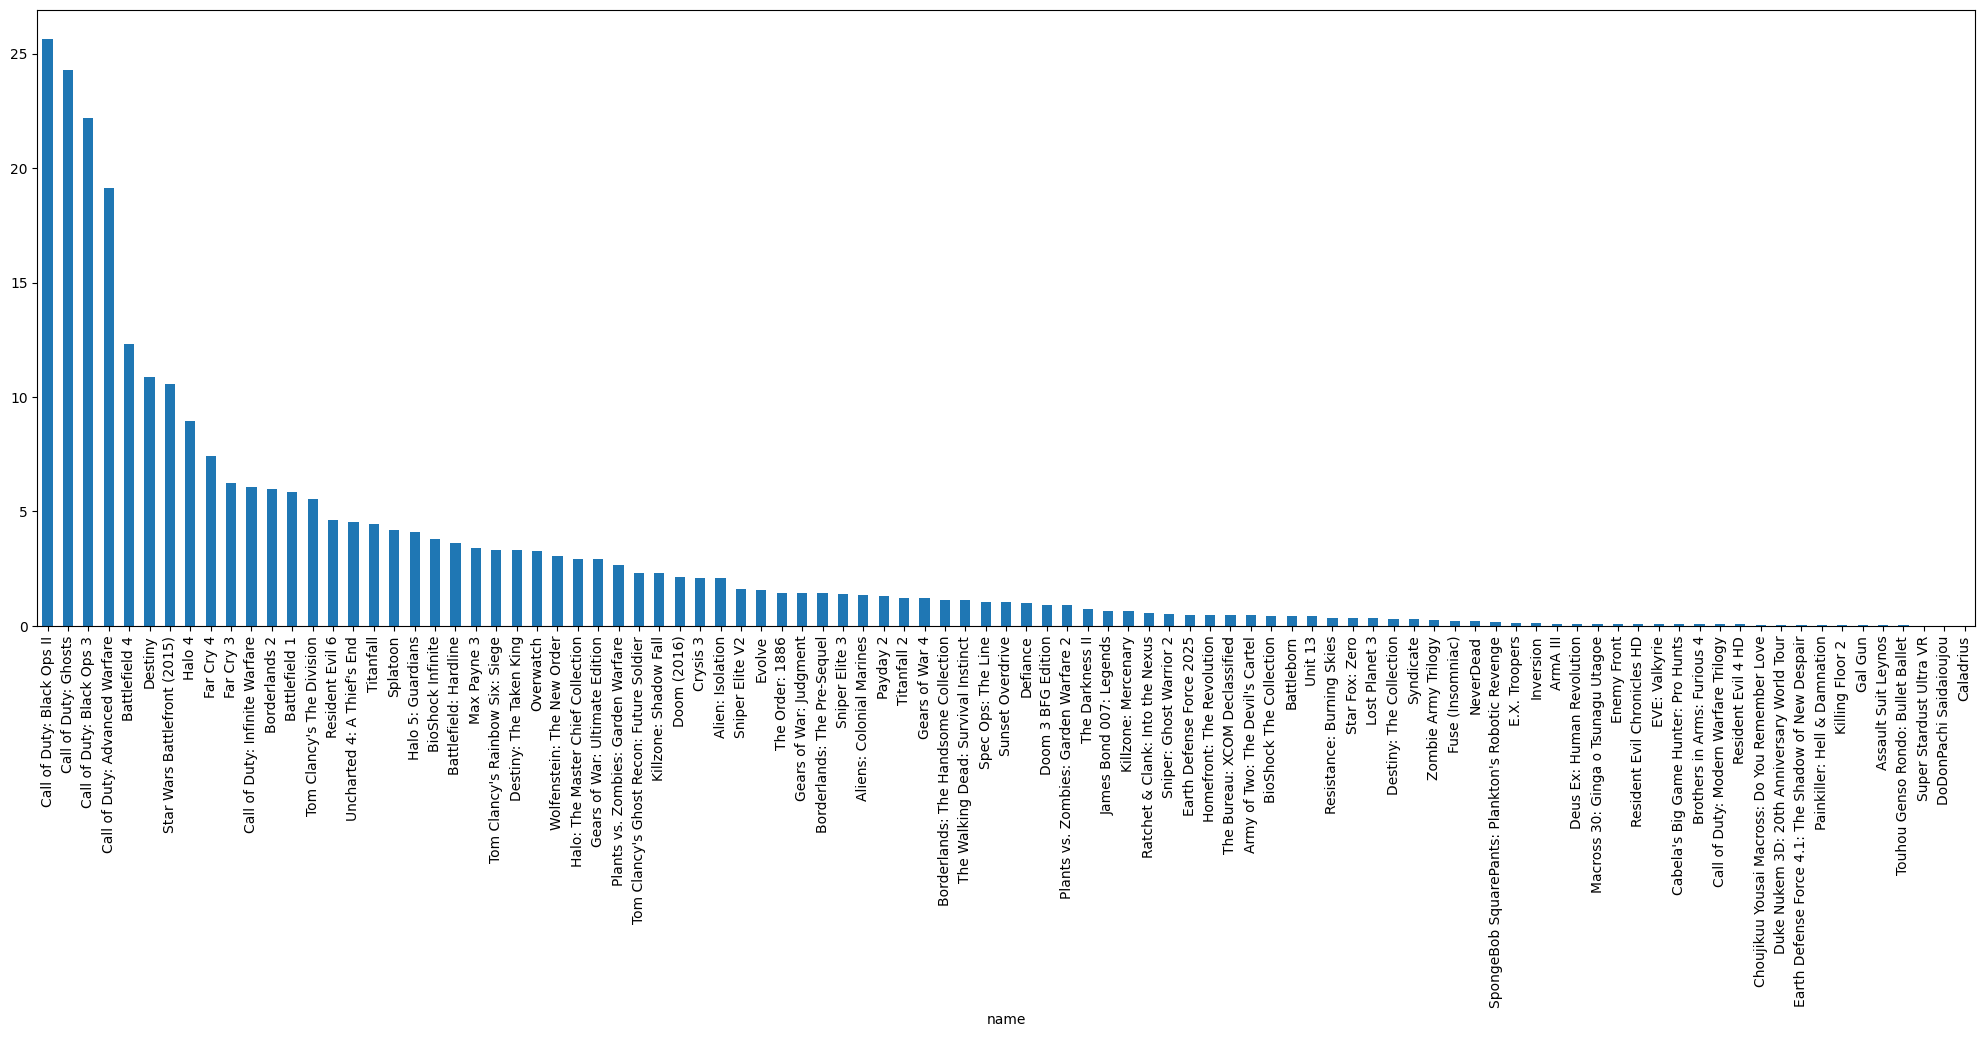

In [105]:
df2[df2['genre'] == 'Shooter'].groupby('name')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(25,8))

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

В таком нагруженном графике лучше выводить только топ-значения.    
</div>

В жанре "Шутанов" "тащит" серия Call of Duty. Учтём это при закупе.

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Молодец, что рассмотрел разносторонне. Действительно прибыльность покажут не суммарные продажи, а средние или медианные.   
    
</div>

<h2>Составим портрет пользователя каждого региона

<h3>Изучим самые популярные платформы (топ-5):

In [48]:
profitable_platform = df2.groupby('platform_general').agg({'na_sales':'sum',
                                     'eu_sales':'sum',
                                     'jp_sales':'sum',
                                     'total_sales':'sum'}).sort_values('total_sales', ascending=False).head()

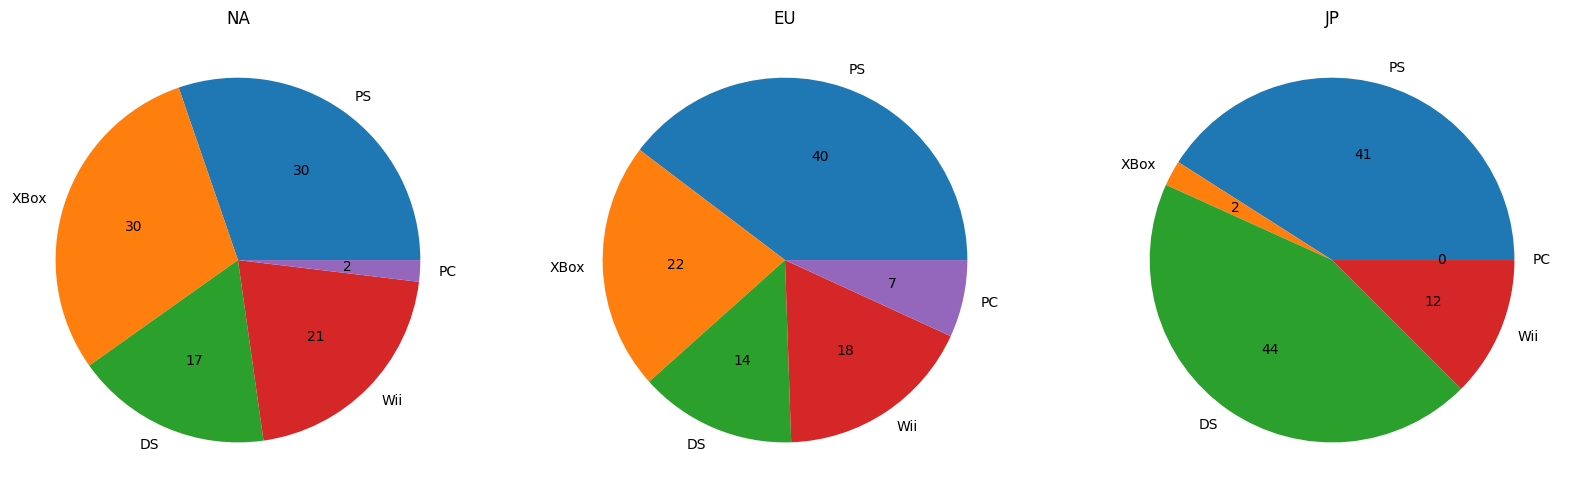

In [49]:
fig = plt.Figure()

fig = plt.Figure(figsize=(20, 40))
na = fig.add_subplot(1, 3, 1)
eu = fig.add_subplot(1, 3, 2)
jp = fig.add_subplot(1, 3, 3)

_= na.pie(x=profitable_platform['na_sales'], autopct='%.0f', labels=profitable_platform.index)
_= eu.pie(x=profitable_platform['eu_sales'], autopct='%.0f', labels=profitable_platform.index)
_= jp.pie(x=profitable_platform['jp_sales'], autopct='%.0f', labels=profitable_platform.index)

na.set_title('NA')
eu.set_title('EU')
jp.set_title('JP')
fig

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Здорово, что использовал subplot, так графики проще сравнивать. Стоит только добавить общий заголовок.
</div>

Структура продаж относительно платформы в Европе и Северной Америке очень схожи, за исключение того, что в Европе любят игры на ПК больше чем в других регионах, хотя доля продаж ПК всё еще не велика.<br>
 В Японии же доминируют местные производители Nintendo (Wii и DS) и Sony (PS), XBox занимает всего 2% рынка. На ПК японцы совсем не играют

<h3>Изучим самые популярные жанры (топ-5):

In [50]:
profitable_genre = df2.groupby('genre').agg({'na_sales':'sum',
                                                           'eu_sales':'sum',
                                                           'jp_sales':'sum',
                                                           'total_sales':'sum'}).sort_values('total_sales', ascending=False).head()

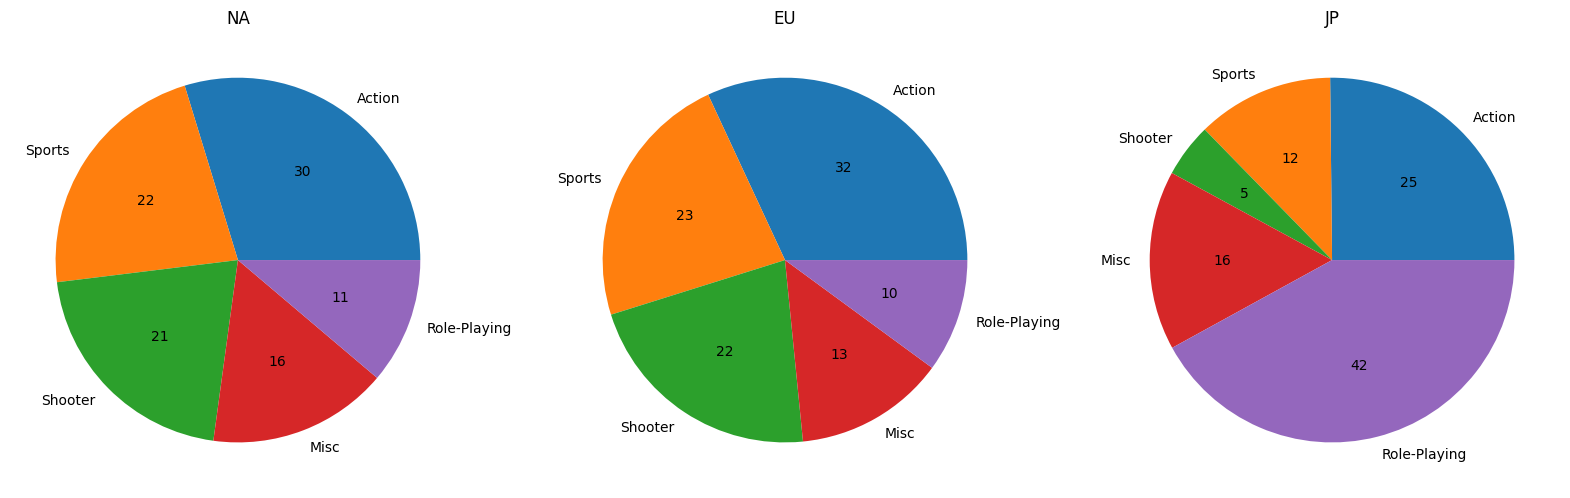

In [51]:
fig = plt.Figure()

fig = plt.Figure(figsize=(20, 40))
na = fig.add_subplot(1, 3, 1)
eu = fig.add_subplot(1, 3, 2)
jp = fig.add_subplot(1, 3, 3)

_= na.pie(x=profitable_genre['na_sales'], autopct='%.0f', labels=profitable_genre.index)
_= eu.pie(x=profitable_genre['eu_sales'], autopct='%.0f', labels=profitable_genre.index)
_= jp.pie(x=profitable_genre['jp_sales'], autopct='%.0f', labels=profitable_genre.index)

na.set_title('NA')
eu.set_title('EU')
jp.set_title('JP')
fig

Так же картин. Европа и Северная Америка мало отличаются друг от друга – самые популярные жанры:
<ol>
    <li>Action</li>
    <li>Sports</li>
    <li>Shooter</li>
    <li>Misc</li>
    <li>Role-Plaing</li>
</ol>
В Японии же доминируют "ролевухи" и сильно просидают "шутаны"

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font> 

Можно при анализе платформ и жанров все, что не вошло в ТОП-5 объединять в "другие" - так картина анализа будет более полной.

<h3> Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе:

In [116]:
# Исправление с учетом замечания, расположенного ниже
df2['rating'].fillna('unknow', inplace=True)

C:\Users\grinkevich\AppData\Local\Temp\ipykernel_5768\3282969084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating'].fillna('unknow', inplace=True)


In [118]:
genre_counts = df2.groupby('rating').agg({'na_sales':'sum',
                                          'eu_sales':'sum',
                                          'jp_sales':'sum'})

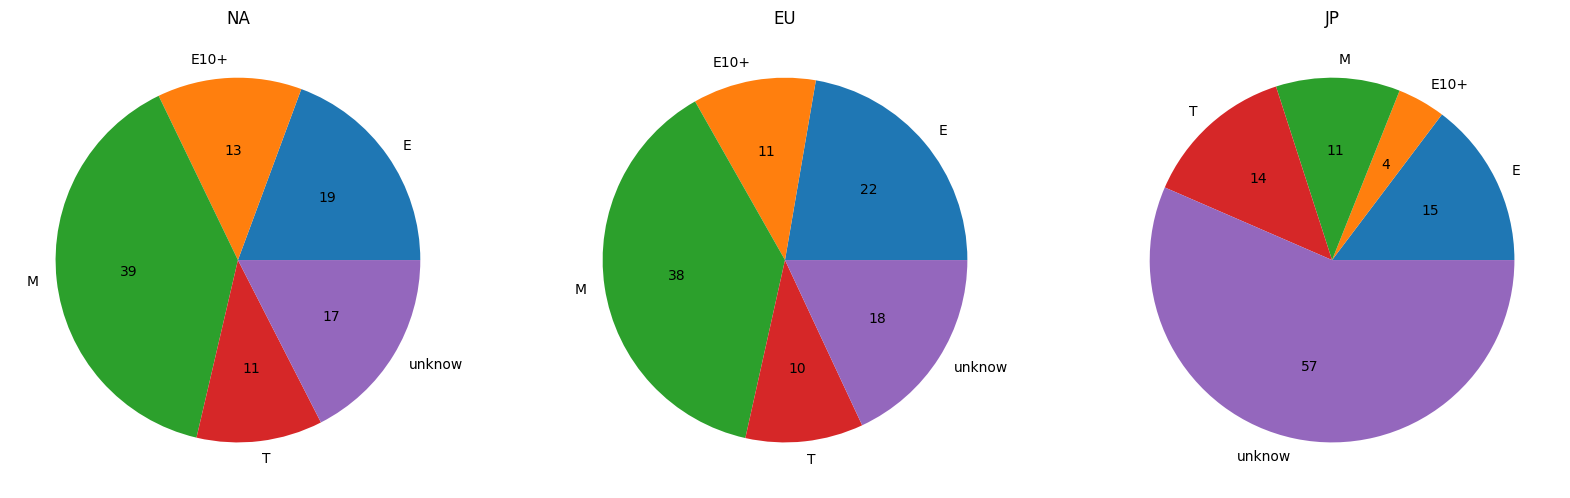

In [119]:
fig = plt.Figure()

fig = plt.Figure(figsize=(20, 40))
na = fig.add_subplot(1, 3, 1)
eu = fig.add_subplot(1, 3, 2)
jp = fig.add_subplot(1, 3, 3)

_= na.pie(x=genre_counts['na_sales'], autopct='%.0f', labels=genre_counts.index)
_= eu.pie(x=genre_counts['eu_sales'], autopct='%.0f', labels=genre_counts.index)
_= jp.pie(x=genre_counts['jp_sales'], autopct='%.0f', labels=genre_counts.index)


na.set_title('NA')
eu.set_title('EU')
jp.set_title('JP')
fig

Различия продаж всех трех регионов не значительны. Разве что в Японии больше доля продаж игр с рейтингом T, в основном за счет снижения доли игр в ретингом M

<br/>
<div style="border:solid Red 2px; padding: 40px">
    <div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку ❌:</b> 
    
При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах. Может быть стоило пропуски в рейтингах заменить на значение-заглушку? Исправь этот момент и прокомментируй разницу, если она будет. Напиши свои размышления в выводе к этому пункту, где и почему чаще всего покупают игры без рейтинга.
   
  
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Как всегда – Азия на своей волне</b><br>
Скорее всего, это как-то связанно с рейтинговыми агенствами. Т.е. какие-то игры в японии вовсе не проходят процедуру оценки западный рейтинговых агенств.
</div>

<h2>Проверим некоторые гипотезы

<h3>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

h0 – Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (P1 = P2)<br>
h1 – Средние пользовательские рейтинги платформ Xbox One и PC отличаются (P1 <> P2)

In [54]:
for col in df2.columns:
    print(col)

name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating
total_sales
platform_general


In [55]:
df2['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU',
       'PS2', 'PSP', 'PSV', 'GBA', 'GC', 'XB', 'DC'], dtype=object)

In [56]:
print('Размер первой выборки:',len(df2[df2['platform'] == 'XOne']['user_score'].dropna()))
print('Размер второй выборки:',len(df2[df2['platform'] == 'PC']['user_score'].dropna()))

Размер первой выборки: 182
Размер второй выборки: 616


In [57]:
alpha = .01
# Т.к. объём выборки можно считать большим, уместно применить уровень значимости в  1 %
# Подробнее об это можно узнать тут: https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Размер выборки не всегда является критерием выбора. Мы отталкиваемся не от распределения или еще чего, а от задачи. 5% значит, что мы допускаем такую погрешность, т.е. в 5 из 100 случаев можем промахнуться. Если у нас задача с медициной, например, то нам уже захочется более жесткие порог выставить, потому что 5% будет многовато.
    
</div>

<AxesSubplot: >

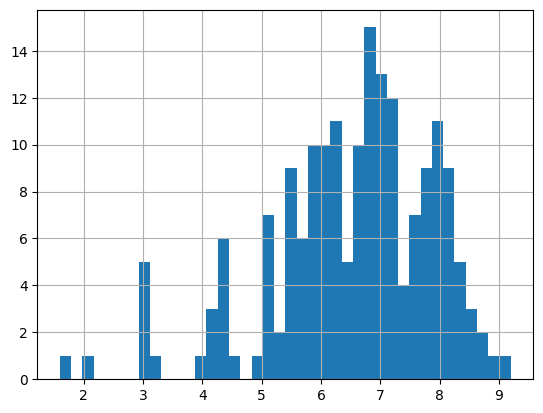

In [58]:
df2[df2['platform'] == 'XOne']['user_score'].dropna().hist(bins=40)

<AxesSubplot: >

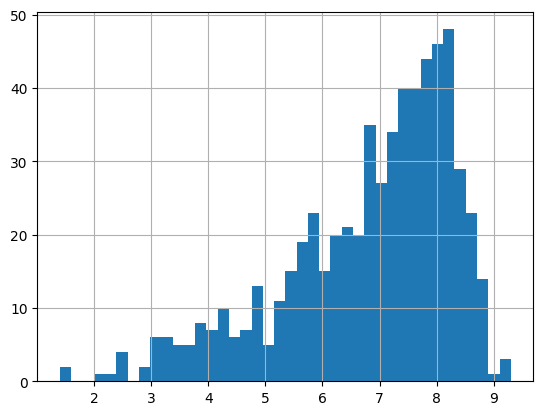

In [59]:
df2[df2['platform'] == 'PC']['user_score'].dropna().hist(bins=40)

Обе выборки ГС распределены нормально, но вторая имеет выраженное смещение влево.<br>
Т.к. обе выборки достаточно велики (количество значение > 30), присвоим параметру `equal_var` значение `True`

In [60]:
results = st.ttest_ind(
  df2[df2['platform'] == 'XOne']['user_score'].dropna(),
  df2[df2['platform'] == 'PC']['user_score'].dropna(), 
  equal_var = True
  )

In [61]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.013520557331277105
Не получилось отвергнуть нулевую гипотезу


<h3>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.;

h0 – Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые (P1 = P2)<br>
h1 – Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются (P1 <> P2)

<AxesSubplot: >

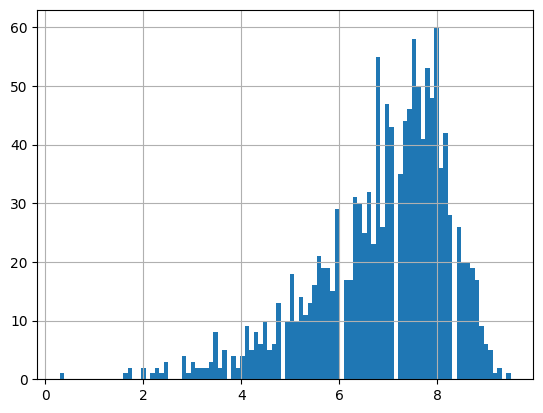

In [62]:
df2[df2['genre'] == 'Action']['user_score'].dropna().hist(bins=100)

<AxesSubplot: >

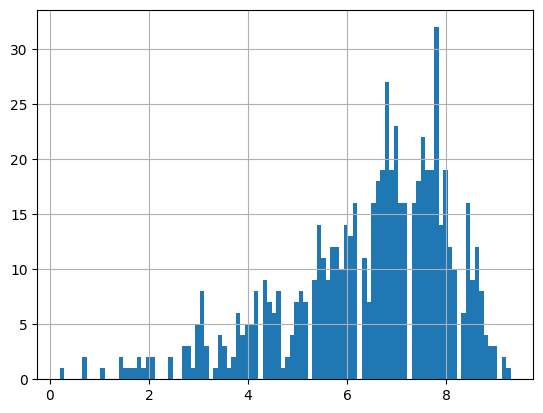

In [63]:
df2[df2['genre'] == 'Sports']['user_score'].dropna().hist(bins=100)

Обе выборки ГС распределены нормально и имеют выраженное смещение влево.<br>
Т.к. обе выборки достаточно велики (количество значение > 30), присвоим параметру `equal_var` значение `True`

In [64]:
print('Размер первой выборки:',len( df2[df2['genre'] == 'Action']['user_score'].dropna()))
print('Размер второй выборки:',len(df2[df2['platform'] == 'PC']['user_score'].dropna()))

Размер первой выборки: 1325
Размер второй выборки: 616


In [65]:
alpha = .01
# Т.к. объём выборки можно считать большим, уместно применить уровень значимости в  1 %
# Подробнее об это можно узнать тут: https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/

In [66]:
results = st.ttest_ind(
  df2[df2['genre'] == 'Action']['user_score'].dropna(),
  df2[df2['genre'] == 'Sports']['user_score'].dropna(), 
  equal_var = True
  )

In [67]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.095316868664557e-11
Отвергаем нулевую гипотезу


<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Верно выбран двусторонний тест. Молодец, что не забываешь удалять пропуски перед проверкой гипотез. Отлично, что выводишь значение `results.pvalue`, в случае, если оно расчиталось не верно (например, равно NaN) - это можно сразу увидеть.
    
    
</div>

<h2><strong>Общий вывод</strong></h2>
<p>В настощий момент рынок видеоигр находится в стагнации. Это му периоду предшествовал продолжительный рост до 2008 - 2009 годов.
<p>На рынке присутсвуют три лидера: PlayStation, Xbox и Nintendo. Они меняют покаления флагманских платфор каждые 5 лет, но игры продаются на протяжении 10 лет. Пик продаж приходиться на второй - третий год продаж очередного поколения платформы.
<p>Оценки играков и профессиональных критиков могут несовпадать, на продажи влияют в основном оценки критиков.
<p>В пятёрку самых продаваемых жанров входят:
<ol>
<li>Action</li>
<li>Sports</li>
<li>Shooter</li>
<li>Misc</li>
<li>Role_Playing</li>
</ol><br>
При оценке игры с точки зрения жанра стоит учитывать и валатильность, т.к. в некоторых жанрах могу встречаться игры–звезды, которые сильно "тащут" продажи. Наример; серия Call of Duty в жанре шутеров.
<br>Структура рынка Северной Америки и Евпропы схожи, а Япония существенно отличаеться. Для прогнозироания продаж Америку и Европу можно оъединить.



<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

Основные моменты в выводах учтены, общий вывод отвечает на поставленные в задаче вопросы.  

    
Пожалуйста, исправь те ячейки, где я оставила комментарии красным и обязательно посмотри, относятся ли твои будущие изменения к полному выводу.
    
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

<h2> Общий вывод по проекту <a class="tocSkip"> </h2>

Спасибо за твой проект! Проделана большая работа, и видно твое внимательное отношение к содержанию анализа и к оформлению. Ты молодец! Практически все ключевые этапы работы над проектом выполнены, код логичен и понятен, комментарии и выводы написаны, так что в целом справиться с задачей тебе удалось. Возле моментов, на которые стоит обратить внимание, я оставила комментарии.
    
**Отдельно хочу отметить положительные моменты в твоей работе:**
    
* На всех этапах тобой предложены интересные решения и методы для их реализации.
* Ты грамотно используешь визуализацию. Это здорово, т.к. помогает быстро считать информацию получателю отчета.
* Ты грамотно делаешь выводы, на основе полученной информации. 
    
**Моменты, требующие внимания:**


* Поправь код загрузки файла.
* Стоит добавить заголовок и введение в проект.
* Добавь вывод на этапе обзора данных.
* Сделай проверку на дубликаты.
* Не все пропуски обработаны и прокомментированы. Опиши причины, которые могли привести к пропускам. 
* Скорректируй расчет суммарных продаж.    
* Поправь актуальный период.
* Пересмотри построение диаграмм "ящиков с усами".
* Нужно добавить в оценку влияния вида возрастного рейтинга ESRB на продажи игры, в которых рейтинг не указан, внеси полученные результаты в вывод.
* И обязательно соотнести итоговый вывод, после учета всех комментариев.
* Остальные рекомендации ты найдешь в моих комментариях!    
    
**Желаю удачи и жду твой проект на повторное ревью!**

<h2>